# EK121 Final Project, Fall 2023

*Title:*

Social Security Disability Requests Vary by Northern vs. Southern States in the USA

*Submitted Date:*

Oct. 16, 2023

-------------


*My name and Boston University email address*, as a tuple:

In [35]:
myname = ("Andrew Sabelhaus", "asabelha@bu.edu")

*My teammates' names and Boston University email addresses, as tuples:*

In [36]:
teammate1 = ("Jeffrey Carruthers", "jbc@bu.edu")

In [37]:
teammate2 = ("Jacob Norman", "jfnorman@bu.edu")

In [38]:
teammate3 = ()

-------------

*Summary:*

Something about Social Security Disability and why it's important. Some dataset could answer an important question for us. We used data this-or-that. Our analysis...

--insert-your-project-here--

Setup:

In [1]:
import numpy as np #numpy maybe not needed
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,8)
# rcParams from https://matplotlib.org/stable/users/explain/customizing.html

In [2]:
data_url = "https://www.dropbox.com/s/ie1zvkr7iht2i1j/public_workingtimedata.dta?dl=1" # store data url here

df = pd.read_stata(data_url) # data is a stata file, so use read_stata to get dataframe set up
#df.to_csv('./csv.csv') # test used so we can look at raw data and as CSV instead of .dta/stata
#no real cleaning required, very nice data set. Some NaN values that will be discussed later, but largely not impactful.

### Global Labor Trends

We hypothesize that, globally, there has been a shift to lower labor hours due to World War II.

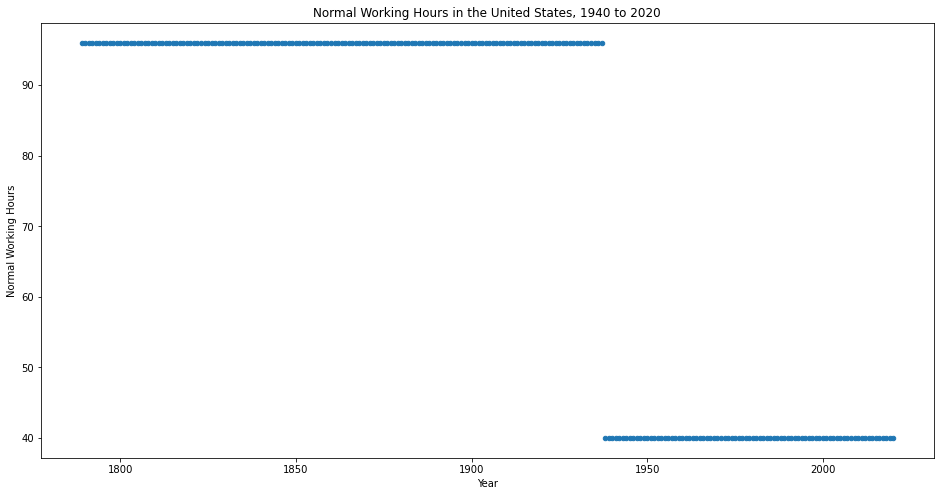

In [3]:
# Plot 1.1

df_by_year = df.sort_values(["year"]) # sort everything by year
df_US = df.loc[df['country_name'] == "United States of America"] # get only the USA labor hours data

df_US_hours = df_US[["country_name", "year", "normalhours"]] # only get these columns 
df_US_hours.plot.scatter(x="year", y="normalhours") # plot the year vs. normal working hours

plt.xlabel('Year')
plt.ylabel('Normal Working Hours')
plt.title('Normal Working Hours in the United States, 1940 to 2020')

plt.show()

As reflected in the plot, we can see that normal working hours in the United States changed drastically around the late 30s and early to mid 40s. World War II started in 1939 and ended in 1945. 

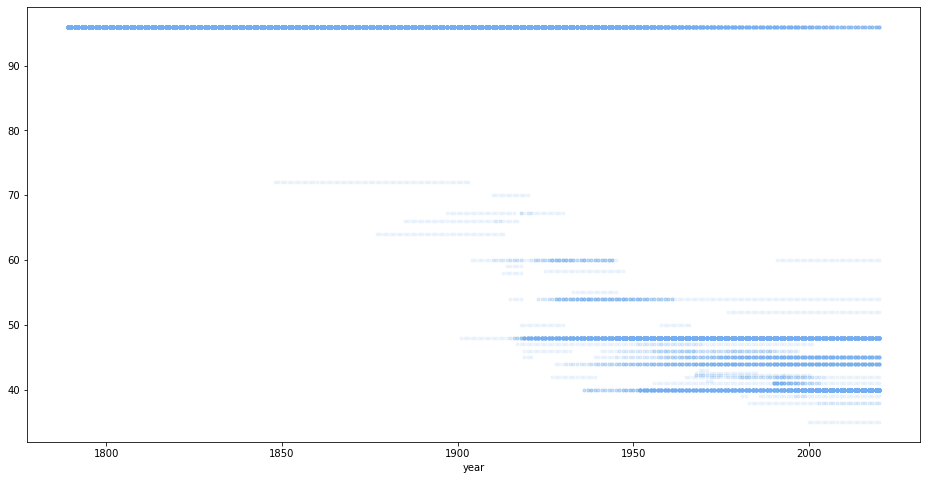

In [4]:
# Plot 1.2
pd.pivot_table(df.reset_index(), index='year', columns='country_name', values='normalhours').plot(legend=None, alpha=0.1, linestyle='None', marker='.', color="#72aef2") # https://www.statology.org/pandas-groupby-plot/
plt.show()

It is evident that there is a cluster around 50-40 hours after around 1930s-1940s. This is a smiliar trend worldwide as to plot 1.1, where normal working hours started out higher pre-WWII, and ended lower post-WWII. Although a trend is visible, but there are lots of data points. Let us look at fewer countries to see this trend more clearly and simply. 

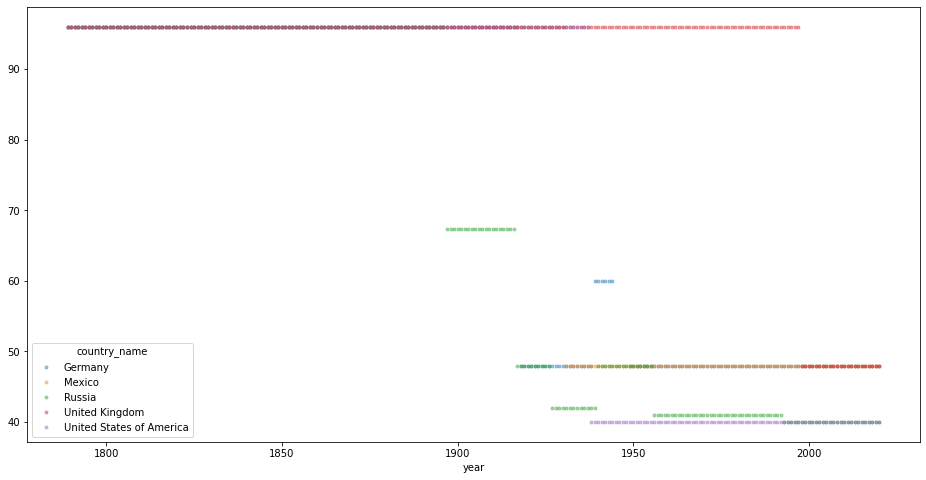

In [6]:
# Plot 1.3
#look at fewer countries here to illustrate a sort of trend more simply (like 4-6 countries)

df_select = df.loc[df['country_name'].isin(['United States of America', 'Mexico', 'Russia', 'Germany', 'United Kingdom'])]
#df_select = df.loc[df['country_name'].isin(['United Kingdom'])]

pd.pivot_table(df_select.reset_index(), index='year', columns='country_name', values='normalhours').plot(alpha=0.4, linestyle='None', marker='.')
plt.show()

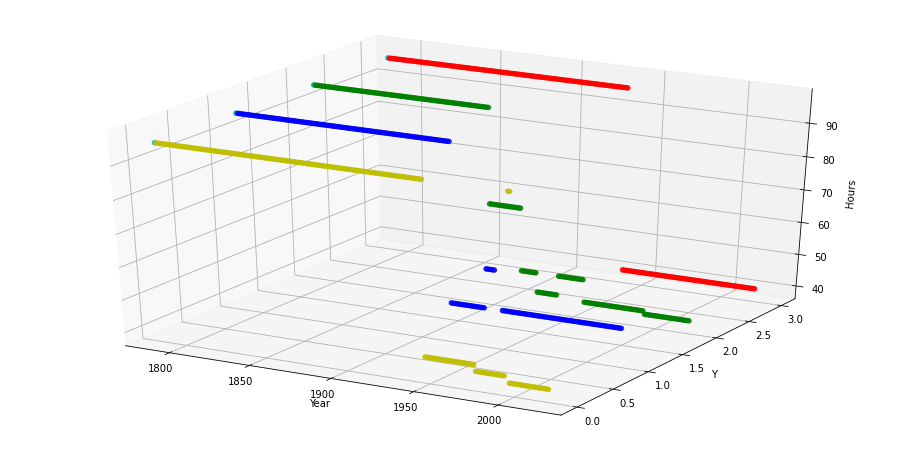

In [7]:
# Plot 1.3.1 (3D)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
colors = ['r', 'g', 'b', 'y']
yticks = [3, 2, 1, 0]
country = ['United States of America', 'Russia', 'Germany', 'Japan']

for clr, ypos, ctry in zip(colors, yticks, country):
    df_country = df.loc[df['country_name'] == ctry]

    xs = df_country['year']
    ys = ypos
    zs = df_country['normalhours']

    cs = [clr] * len(xs)
    cs[0] = 'c'

    ax.scatter(xs, ys, zs, color= cs, alpha= 0.8)

ax.set_xlabel('Year')
ax.set_ylabel('Y')
ax.set_zlabel('Hours')

plt.show()

### Hypothesis 2: Overtime hours and Work Culture

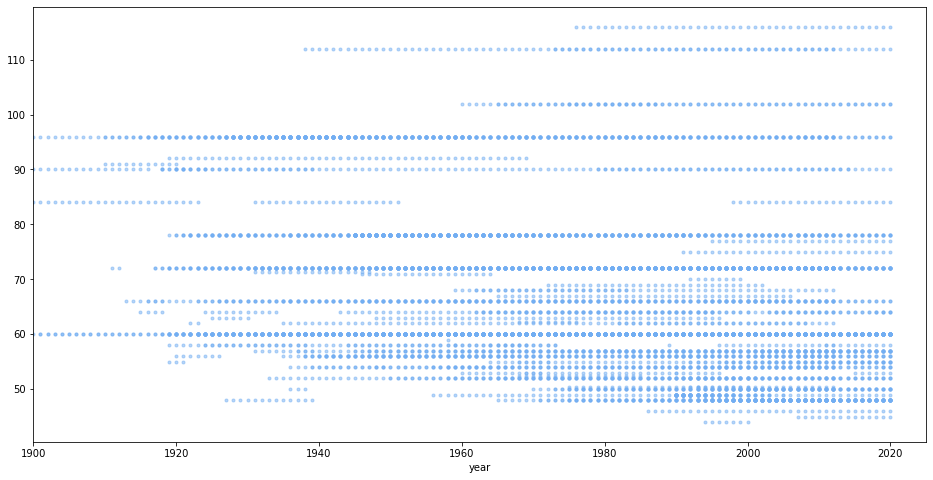

In [8]:
# Plot 2.1

df.plot(x='year',y='hours_max', legend=None, alpha=0.5, linestyle='None', marker='.', color="#72aef2") # scatter of year vs. max hours

plt.xlim(1900, 2025) # cut out values pre-1900, dataset limited in scope at this point

plt.show()

discuss trend

However, if we inspect the dataframe we can see that 'hours_max' has many NaN (missing) values. This could easily make this data less accurate, so let's inspect how many NaN items are in this column using the code below.

In [11]:
df_hours_max_and_country = df[['country_name', 'hours_max']]
count_NaN_max_hours = 0

NaN_dict = {}
NaN_list = []

#make a dictionary of format 'country':(number of nan items)
for index, row in df_hours_max_and_country.iterrows(): #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html#pandas-dataframe-iterrows 
    if(row['hours_max'] != row['hours_max']): #check if max_hours is NaN by checking if equal to self
        count_NaN_max_hours+=1
        if(not row['country_name'] in NaN_dict.keys()):
            NaN_dict[row['country_name']] = 1
        else:
            NaN_dict[row['country_name']] += 1

for key in NaN_dict:
    NaN_list.append([key, NaN_dict[key]])

df_NaN_max_hours = pd.DataFrame(NaN_list, columns=['Country', 'NaN Max Hours']).sort_values(by='NaN Max Hours').set_index(['Country'])


print(f"There are {count_NaN_max_hours} NaN items in the 'hours_max' column, out of the total of 27192 rows!")
#df_NaN_max_hours.loc[df_NaN_max_hours['NaN Max Hours'] > 100].plot.hist()
#plt.show()



There are 15785 NaN items in the 'hours_max' column, out of the total of 27192 rows!


With so many NaN values, it's clear that any trend we see in the plot above does not reflect a completely global trend, at least at some points in time.

We can plot some of this data to check what countries have these NaN values and investigate why, though it's a bit of an uglier bar graph.

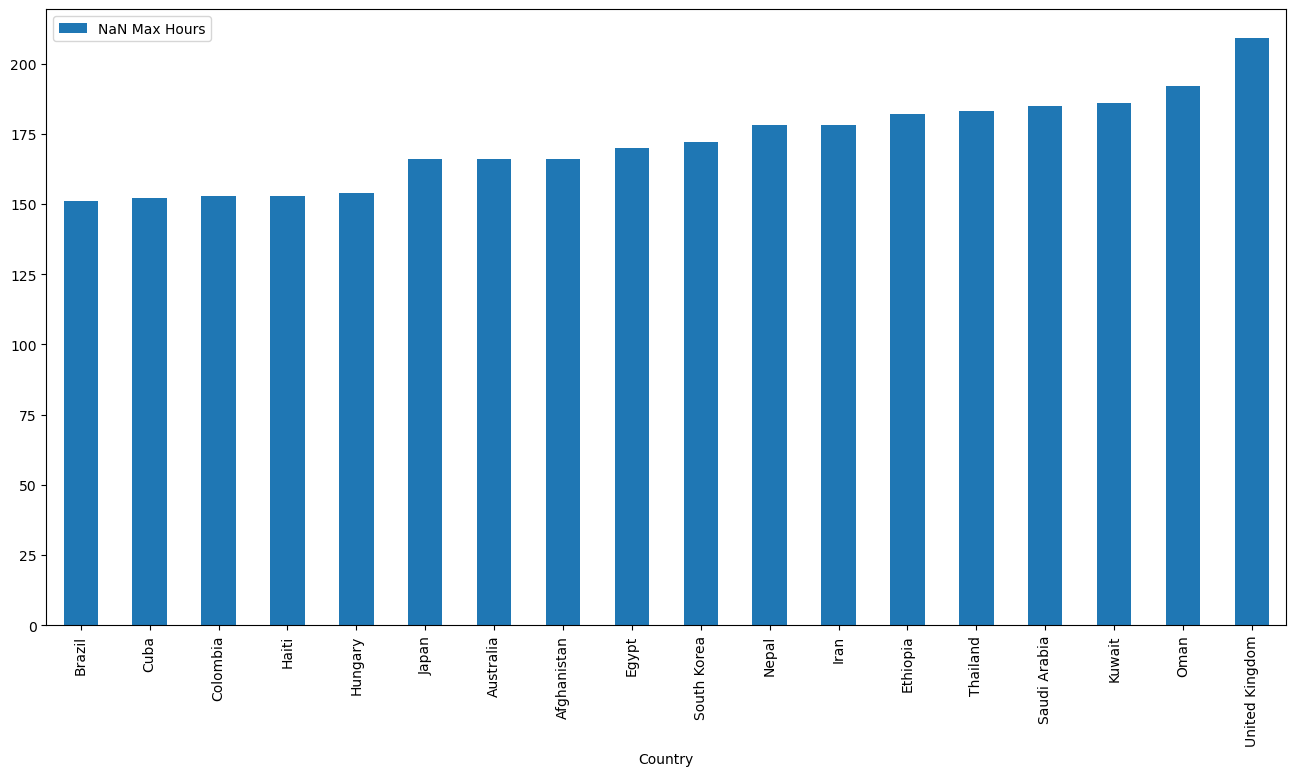

In [119]:
df_NaN_max_hours.loc[df_NaN_max_hours['NaN Max Hours'] > 150].plot.bar()
plt.show()

Picking some countries from this bar graph, we can see that there are various reasons for this missing data:


In [ ]:

df_JP = df.loc[df['country_name'] == "Japan"]
df_JP_hours = df_JP[["country_name", "year", "hours_max"]]
print(df_JP_hours)

df_2020 = df.loc[df["year"] == 2020]
df_2020.plot.scatter(x="normalhours", y="hours_max")